In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

<h2> 1. What Factors Affect the Price of an Airbnb Listing in Seattle? </h2>

<h3> Loading and exploring the Seattle Airbnb Data </h3>

In this first section, we are going to load and explore the Seattle Airbnb Data set. The aim is to identify the most important features which we can use to answer the business questions given above.

In [2]:
df_seattle_calendar = pd.read_csv('./seattle_airbnb_data/calendar.csv')
df_seattle_listings = pd.read_csv('./seattle_airbnb_data/listings.csv')
#df_seattle_reviews = pd.read_csv('./seattle_airbnb_data/reviews.csv')

In [4]:
print(df_seattle_calendar.head())
print(df_seattle_calendar.info())

print(df_seattle_listings.head())
print(df_seattle_listings.info())

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None
        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-0

In [11]:
df_seattle_listings_no = df_seattle_listings.select_dtypes(exclude=['object'])

In [15]:
df_seattle_listings_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   scrape_id                       3818 non-null   int64  
 2   host_id                         3818 non-null   int64  
 3   host_listings_count             3816 non-null   float64
 4   host_total_listings_count       3816 non-null   float64
 5   latitude                        3818 non-null   float64
 6   longitude                       3818 non-null   float64
 7   accommodates                    3818 non-null   int64  
 8   bathrooms                       3802 non-null   float64
 9   bedrooms                        3812 non-null   float64
 10  beds                            3817 non-null   float64
 11  square_feet                     97 non-null     float64
 12  guests_included                 38

In [25]:
print(len(df_seattle_listings['neighbourhood'].unique()))
print(df_seattle_listings['host_response_rate'].unique())

82
['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%']


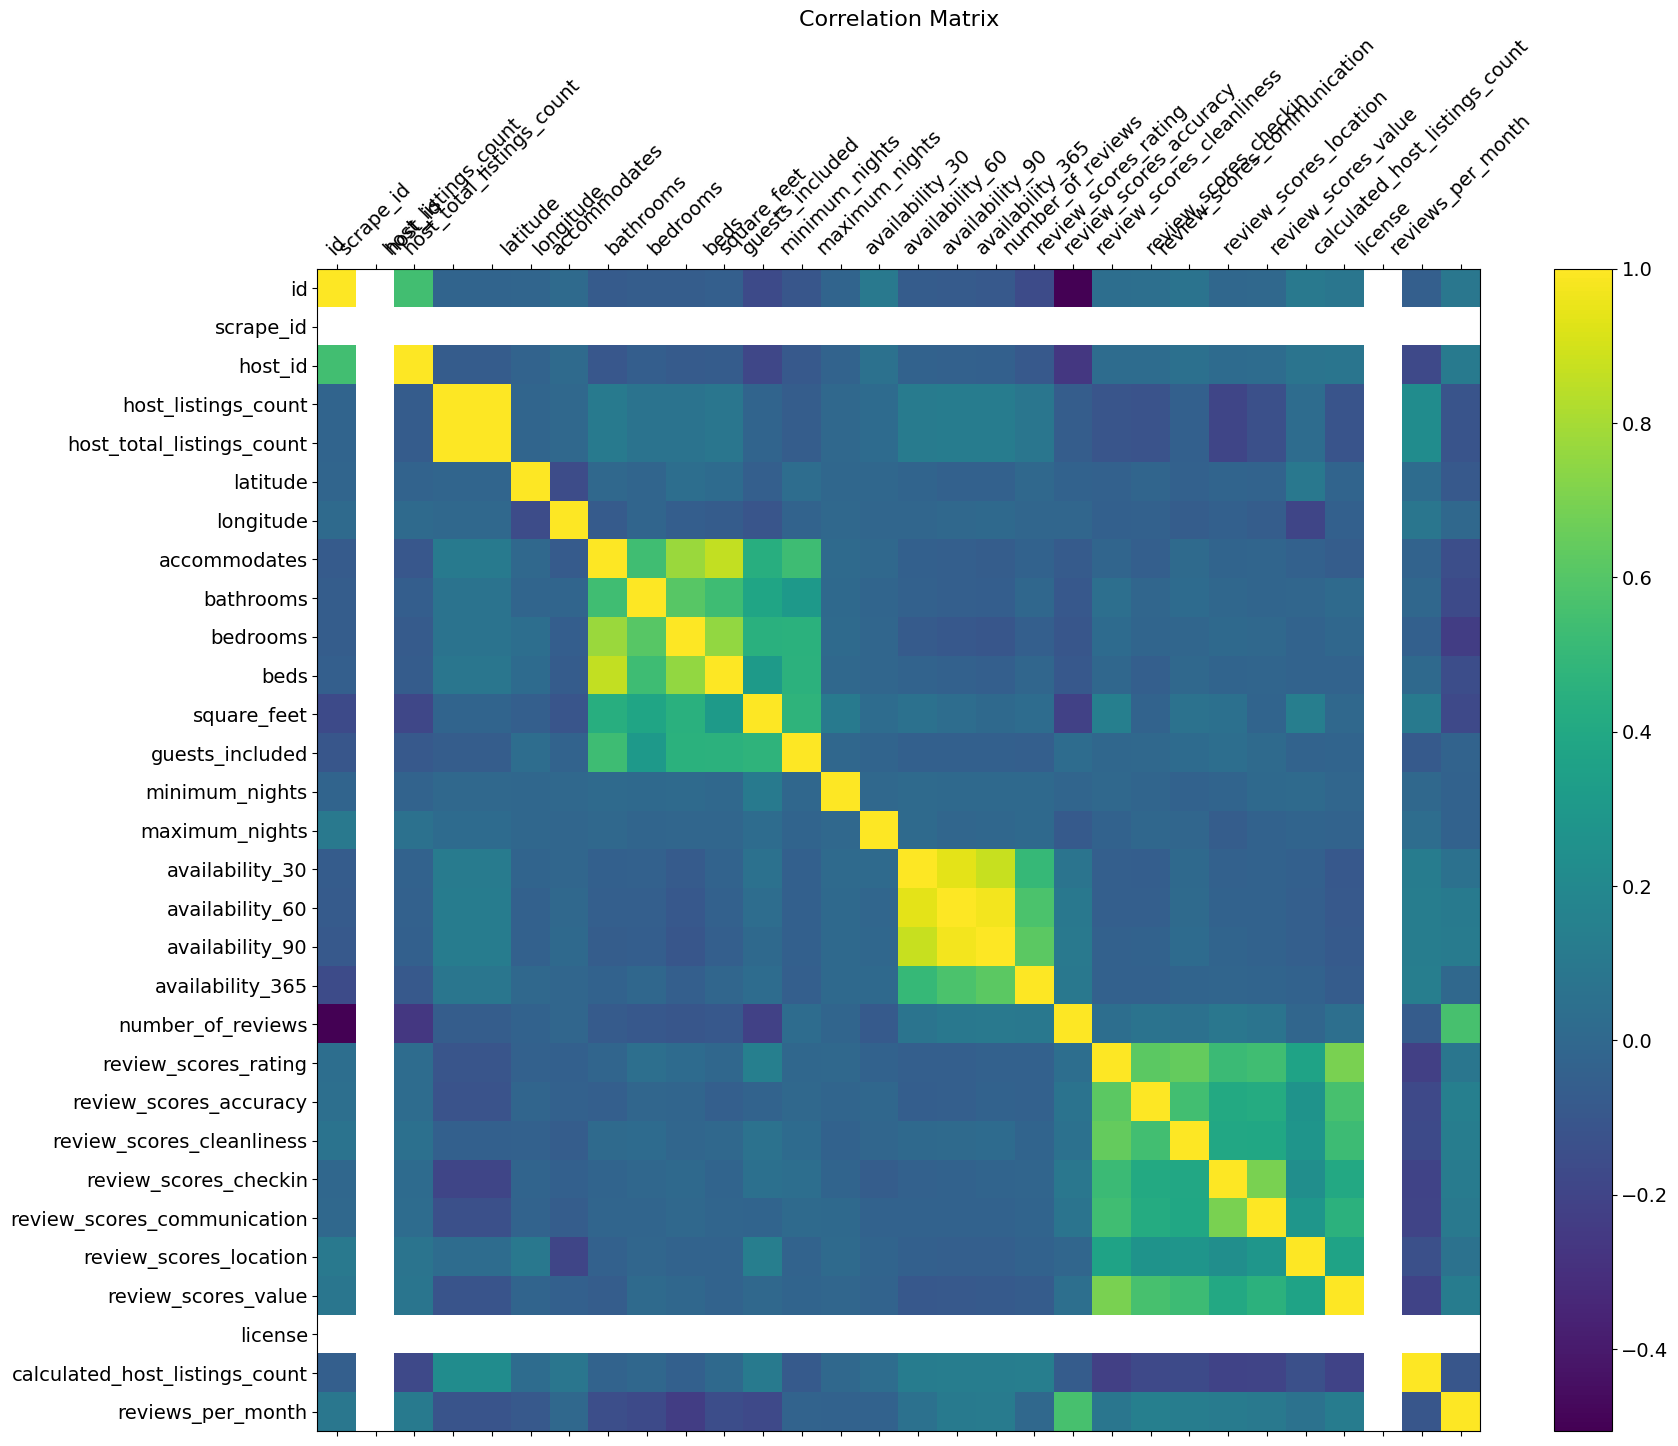

In [17]:
#plt.matshow(df_seattle_listings_no.corr())
#plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df_seattle_listings_no.corr(), fignum=f.number)
plt.xticks(range(df_seattle_listings_no.select_dtypes(['number']).shape[1]), df_seattle_listings_no.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_seattle_listings_no.select_dtypes(['number']).shape[1]), df_seattle_listings_no.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);